## Sistema Lotka-Volterra
### Modelo depredador-presa 

En un modelo Lotka-Volterra es basada en las sigueintes supuestos:
- Solo existen 2 especies, 1 para el depredador y 1 para la presa
- la tasa de variación de la población es directamente proporcional a su tamaño
- la especie depredadora depende totalmente de la especie presa como único suministro de alimento
- no hay limitacion de alimentamiento para la presa

El modelo de depredaro presa es un sistema de 2 ecuaciones diferenciales ordinarias:

$$ \frac{ dx }{ dt } = \alpha x - \beta xy$$

$$ \frac{dy}{dt} = \delta xy - \gamma y$$

In [43]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
""" alpha, beta, delta, gamma = 0.05, 0.01, 0.01, 0.05 """

' alpha, beta, delta, gamma = 0.05, 0.01, 0.01, 0.05 '

In [45]:
alpha, beta, delta, gamma = 0.1, 0.02, 0.01, 0.1  # alpha: tasa de crecimiento de presas, beta: tasa de depredación, 
                                                  # delta: tasa de crecimiento de depredadores, gamma: tasa de muerte de depredadores


In [46]:
num_generations = 400     # Número de generaciones del Algoritmo Genético 
population_size = 50      # Tamaño de la población 
mutation_rate = 0.1       # Tasa de mutación 
num_parents = 10          # Número de padres seleccionados para el cruzamiento en cada generación


In [47]:
class Individual:
    def __init__(self, speed, evasion):
        self.speed = speed          # Atributo 'speed': representa la velocidad del individuo
        self.evasion = evasion      # Atributo 'evasion': representa la capacidad de evasión del individuo
        self.fitness = 0            # Atributo 'fitness': valor de aptitud (inicialmente 0), indica qué tan bueno es el individuo


In [48]:
def fitness_function(prey_population, predator_population,individual):
    fitness = prey_population * individual.evasion - predator_population * individual.speed
    return max(fitness, 0)

In [49]:
def initialize_population(size):
    # Crea una población inicial de individuos con velocidad y evasión aleatorias
    return [Individual(speed=random.uniform(0.5, 1.5), evasion=random.uniform(0.5, 1.5)) for _ in range(size)]

In [50]:
def select_parents(population):
    # Ordena la población de individuos en función de su aptitud (fitness) en orden descendente
    population.sort(key=lambda x: x.fitness, reverse=True)
    
    # Selecciona los primeros 'num_parents' individuos como padres para la siguiente generación
    return population[:num_parents]


In [51]:
def crossover(parent1, parent2):
    # Crea el primer hijo tomando la velocidad del padre 1 y la evasión del padre 2
    child1 = Individual(speed=parent1.speed, evasion=parent2.evasion)
    
    # Crea el segundo hijo tomando la velocidad del padre 2 y la evasión del padre 1
    child2 = Individual(speed=parent2.speed, evasion=parent1.evasion)
    
    # Devuelve los dos hijos generados
    return child1, child2


In [52]:
def mutate(individual):
    # Aplica la mutación al individuo con una probabilidad definida por 'mutation_rate'
    if random.random() < mutation_rate:
        # Modifica el atributo 'speed' agregando un valor aleatorio entre -0.1 y 0.1
        individual.speed += random.uniform(-0.1, 0.1)
        
        # Modifica el atributo 'evasion' agregando un valor aleatorio entre -0.1 y 0.1
        individual.evasion += random.uniform(-0.1, 0.1)
    
    
    return individual


In [53]:
prey_population = 40
predator_population = 10
prey_history, predator_history = [], []

In [54]:
population = initialize_population(population_size)
print(population_size)
print(len(population))

50
50


### Algoritmo genérico y simulación Lotka-Volterra
#### Condiciones ideales

In [55]:
# Diccionario para almacenar speed, evasion y fitness por generación
population_data = {}
print(population_size)
print(f"population inicial {len(population)}")
for generation in range(num_generations):

    for individual in population:
        print(f"individual speed {individual.speed}")
        print(f"individual evasion {individual.evasion}")
        individual.fitness = fitness_function(prey_population, predator_population, individual)
        print(f"individual fitness {individual.fitness}")
    
    # Selección de los mejores individuos
    parents = select_parents(population)
    
    # Crear nueva generación mediante cruce y mutación
    next_generation = []
    for i in range(0, num_parents, 2):
        child1, child2 = crossover(parents[i], parents[i + 1])
        next_generation.append(mutate(child1))
        next_generation.append(mutate(child2))
    print(f"next generation size {len(next_generation)}")
    
    # Añadir hijos mutados a la población y eliminar los menos aptos
    for u in population:
        print(f"fitness {u.fitness}")
        print(f"evasion {u.evasion}")
    population = parents + next_generation
    print(f"parents + next {len(population)}")
    
    population = sorted(population, key=lambda x: x.fitness, reverse=True)[:population_size]
    print(f"sorted {len(population)}")

    # Simulación de un paso de Lotka-Volterra
    prey_population += alpha * prey_population - beta * prey_population * predator_population
    print(f"prey population {prey_population}")
    predator_population += delta * prey_population * predator_population - gamma * predator_population
    print(f"predator population {prey_population} \n")

    # Guardar historia de poblaciones
    prey_history.append(prey_population)
    predator_history.append(predator_population)
    
    # Guardar datos de los primeros 5 individuos en el diccionario
    population_data[generation] = {
        "speed": [ind.speed for ind in population[:5]],
        "evasion": [ind.evasion for ind in population[:5]],
        "fitness": [ind.fitness for ind in population[:5]],
    }

50
population inicial 50
individual speed 1.2107723216963786
individual evasion 0.8315241797941826
individual fitness 21.153243974803523
individual speed 1.4108928093994966
individual evasion 1.191395124802893
individual fitness 33.54687689812076
individual speed 1.0944142423874732
individual evasion 0.6727425482770129
individual fitness 15.96555950720578
individual speed 1.104532696366132
individual evasion 0.90867780970246
individual fitness 25.301785424437085
individual speed 1.393673885875904
individual evasion 1.4538352076447962
individual fitness 44.216669447032814
individual speed 1.101519010725317
individual evasion 0.7490545328462859
individual fitness 18.946991206598263
individual speed 1.4515882297030624
individual evasion 1.066896240129895
individual fitness 28.159967308165168
individual speed 0.8656880024073007
individual evasion 1.1700768485022959
individual fitness 38.14619391601883
individual speed 0.9685270461169447
individual evasion 1.4022967637410322
individual fitn

In [56]:
population_data

{0: {'speed': [0.9611826409974438,
   0.9685270461169447,
   0.5971194619404527,
   1.1938601903306247,
   1.2158018931897696],
  'evasion': [1.4016501732627504,
   1.4022967637410322,
   1.3077156167091162,
   1.4472635179835636,
   1.4504015201325182],
  'fitness': [46.45418052053557,
   46.40660008847184,
   46.337430048960115,
   45.95193881603629,
   45.858041873403025]},
 1: {'speed': [0.5971194619404527,
   0.7022144700115042,
   0.8799368214473042,
   0.5971194619404527,
   1.119747732445816],
  'evasion': [1.4472635179835636,
   1.4504015201325182,
   1.4568315341111977,
   1.3077156167091162,
   1.467191841465422],
  'fitness': [44.57778142695858,
   43.3665524026257,
   41.358731277767085,
   39.554056981078475,
   38.71008486393791]},
 2: {'speed': [0.5971194619404527,
   0.5971194619404527,
   0.5971194619404527,
   0.7022144700115042,
   0.7022144700115042],
  'evasion': [1.4568315341111977,
   1.4504015201325182,
   1.4472635179835636,
   1.4504015201325182,
   1.4472635

In [57]:
# Función para detectar picos (altos y bajos) basados en cambios de dirección
def find_peaks(data):
    peaks = []
    
    # Recorrer los datos desde el segundo hasta el penúltimo elemento
    for i in range(1, len(data) - 1):
        # Detectamos picos altos (máximos locales)
        if data[i-1] < data[i] > data[i+1]:
            peaks.append(i)
        # Detectamos picos bajos (mínimos locales)
        elif data[i-1] > data[i] < data[i+1]:
            peaks.append(i)
    
    return peaks

# Guardar los picos en tablas separadas para presas y depredadores
def save_peaks_to_dataframe(peaks, population_history):
    # Generar lista de valores para la tabla
    rows = []
    generations = range(len(population_history))  # Generamos las generaciones automáticamente
    for peak in peaks:
        # Guardamos la generación, la población y otros datos relevantes
        rows.append([generations[peak], population_history[peak]])

    # Crear DataFrame
    df_peaks = pd.DataFrame(rows, columns=["generation", "population_size"])
    return df_peaks

# Suponiendo que tienes las siguientes listas de historia de poblaciones:
prey_peaks = find_peaks(prey_history)
predator_peaks = find_peaks(predator_history)

# Generar las tablas con los picos de presas y depredadores
df_prey_peaks = save_peaks_to_dataframe(prey_peaks, prey_history)
df_predator_peaks = save_peaks_to_dataframe(predator_peaks, predator_history)

In [58]:
# Mostrar la tabla resultante (presas)
df_prey_peaks

generation  population_size
0          22         0.790453
1          78        42.938751
2         103         0.790052
3         160        42.832438
4         184         0.790210
5         241        42.951550
6         265         0.790943
7         322        42.974576
8         347         0.790268

In [59]:
# Mostrar la tabla resultante (depredadores)
df_predator_peaks

generation  population_size
0           4        19.411077
1          58         0.345157
2          86        19.390816
3         139         0.345414
4         167        19.438632
5         221         0.345231
6         248        19.439636
7         302         0.345109
8         329        19.389701
9         383         0.345214

In [60]:
# Función para calcular promedios
def calculate_averages(generations, population_data):
    averages = []
    for gen in generations:
        if gen in population_data:
            avg_speed = np.mean(population_data[gen]["speed"])
            avg_evasion = np.mean(population_data[gen]["evasion"])
            avg_fitness = np.mean(population_data[gen]["fitness"])
            averages.append([avg_speed, avg_evasion, avg_fitness])
        else:
            averages.append([None, None, None])  # Si no hay datos, se deja vacío
    return averages

# Calcular promedios para los picos de presas y depredadores
prey_averages = calculate_averages(df_prey_peaks["generation"].values, population_data)
predator_averages = calculate_averages(df_predator_peaks["generation"].values, population_data)

# Agregar promedios a los DataFrames
df_prey_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = prey_averages
df_predator_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = predator_averages

In [61]:
df_prey_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0          22         0.790453   0.538476     1.519204     0.000000
1          78        42.938751   0.180684     2.103422    87.901416
2         103         0.790052  -0.206191     2.422681     2.998660
3         160        42.832438  -0.612197     3.120777   136.672954
4         184         0.790210  -0.941955     3.205929     7.598563
5         241        42.951550  -1.191128     3.715478   163.846865
6         265         0.790943  -1.576482     3.897128    11.784500
7         322        42.974576  -1.967800     4.958463   218.416449
8         347         0.790268  -2.152887     5.090333    15.069233

In [62]:
df_predator_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0           4        19.411077   0.597119     1.478232    15.825190
1          58         0.345157   0.253661     1.901440    16.295116
2          86        19.390816   0.052127     2.282195    32.084337
3         139         0.345414  -0.577748     2.790807    23.674204
4         167        19.438632  -0.701856     3.154360    63.433580
5         221         0.345231  -1.194409     3.554401    32.310629
6         248        19.439636  -1.284146     3.820051    90.346283
7         302         0.345109  -1.925280     4.505764    40.138212
8         329        19.389701  -1.989417     4.995217   131.037946
9         383         0.345214  -2.581828     5.515733    48.063651

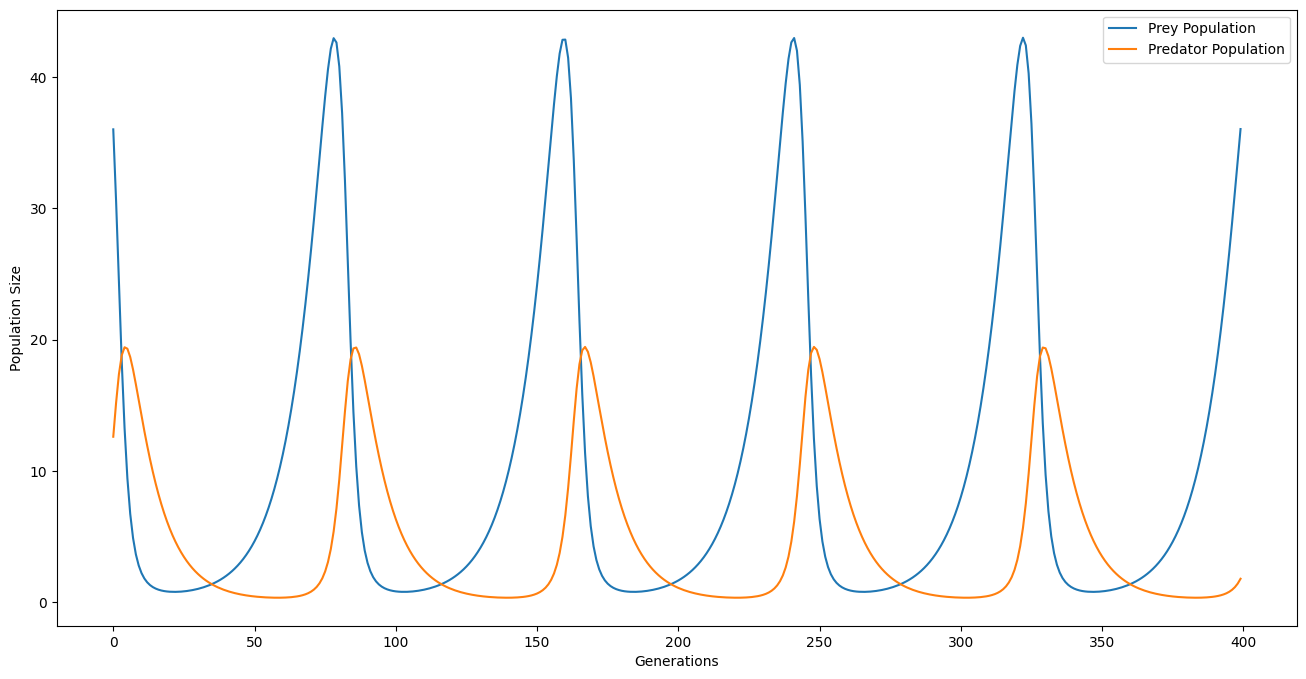

In [63]:
# Graficar los resultados
fig, ax = plt.subplots()
plt.plot(prey_history, label="Prey Population")
plt.plot(predator_history, label="Predator Population")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.legend()
fig.set_size_inches(16,8)
plt.show()

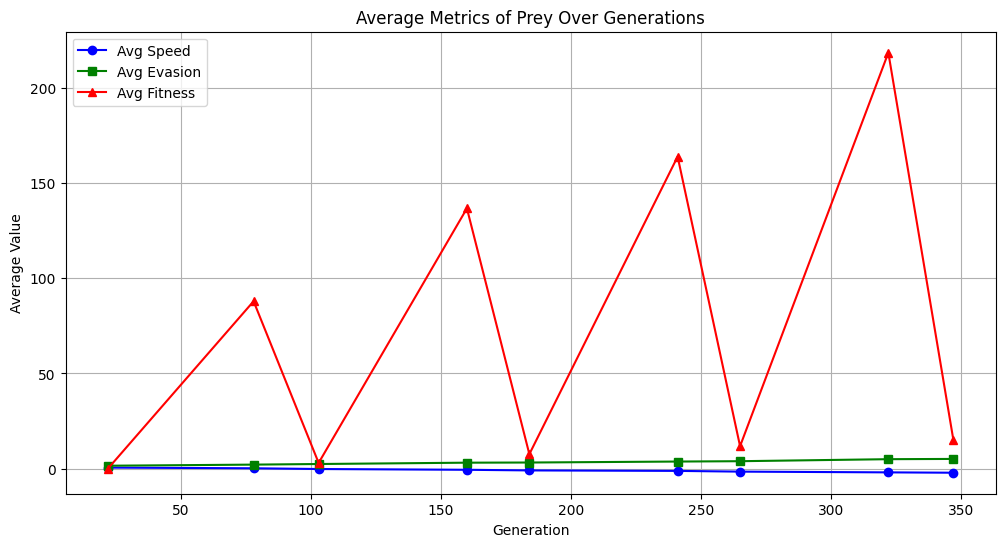

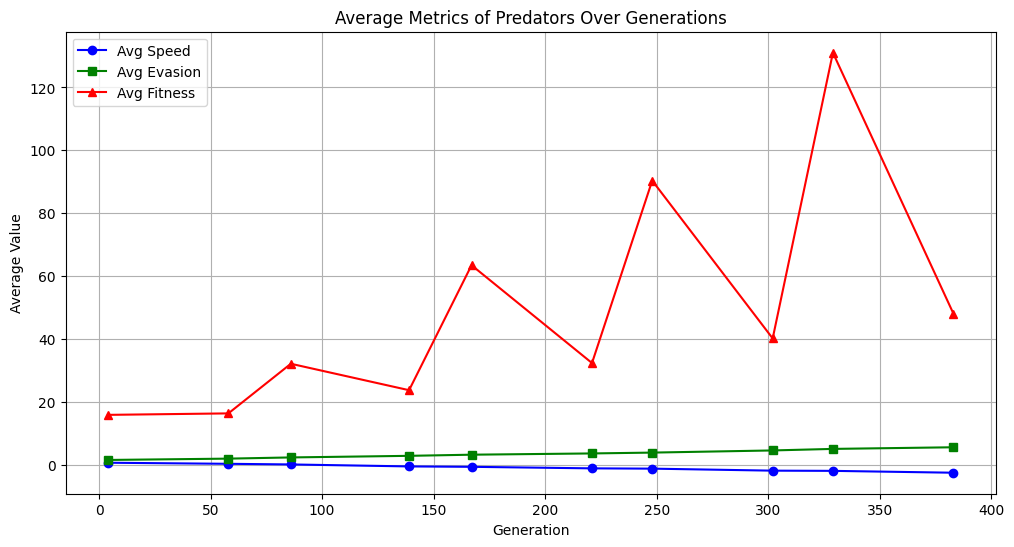

In [64]:
# Graficar métricas para las presas
plt.figure(figsize=(12, 6))
plt.plot(df_prey_peaks["generation"], df_prey_peaks["avg_speed"], label="Avg Speed", marker="o", color="blue")
plt.plot(df_prey_peaks["generation"], df_prey_peaks["avg_evasion"], label="Avg Evasion", marker="s", color="green")
plt.plot(df_prey_peaks["generation"], df_prey_peaks["avg_fitness"], label="Avg Fitness", marker="^", color="red")
plt.title("Average Metrics of Prey Over Generations")
plt.xlabel("Generation")
plt.ylabel("Average Value")
plt.grid()
plt.legend()
plt.show()

# Graficar métricas para los depredadores
plt.figure(figsize=(12, 6))
plt.plot(df_predator_peaks["generation"], df_predator_peaks["avg_speed"], label="Avg Speed", marker="o", color="blue")
plt.plot(df_predator_peaks["generation"], df_predator_peaks["avg_evasion"], label="Avg Evasion", marker="s", color="green")
plt.plot(df_predator_peaks["generation"], df_predator_peaks["avg_fitness"], label="Avg Fitness", marker="^", color="red")
plt.title("Average Metrics of Predators Over Generations")
plt.xlabel("Generation")
plt.ylabel("Average Value")
plt.grid()
plt.legend()
plt.show()


#### Modelo de saturación

In [65]:
prey_population = 40
predator_population = 10
prey_history, predator_history = [], []

In [66]:
population = initialize_population(population_size)
print(population_size)
print(len(population))

50
50


In [67]:
# Parámetros para el modelo de saturación
r = 0.1       # Tasa de crecimiento de las presas
K = 100       # Límite de capacidad de las presas
a = 0.01      # Ineficiencia de la población de presas
c = 0.1       # Tasa de mortalidad de los depredadores
d = 0.01      # Eficiencia de caza del depredador

# Diccionario para almacenar speed, evasion y fitness
generation_data = {}

print(population_size)
print(f"population inicial {len(population)}")
for generation in range(num_generations):
    for individual in population:
        print(f"individual speed {individual.speed}")
        print(f"individual evasion {individual.evasion}")
        individual.fitness = fitness_function(prey_population, predator_population, individual)
        print(f"individual fitness {individual.fitness}")
    
    # Selección de los mejores individuos
    parents = select_parents(population)
    
    # Crear nueva generación mediante cruce y mutación
    next_generation = []
    for i in range(0, num_parents, 2):
        child1, child2 = crossover(parents[i], parents[i + 1])
        next_generation.append(mutate(child1))
        next_generation.append(mutate(child2))
    print(f"next generation size {len(next_generation)}")
    
    # Añadir hijos mutados a la población y eliminar los menos aptos
    for u in population:
        print(f"fitness {u.fitness}")
        print(f"evasion {u.evasion}")
    population = parents + next_generation
    print(f"parents + next {len(population)}")
    
    population = sorted(population, key=lambda x: x.fitness, reverse=True)[:population_size]
    print(f"sorted {len(population)}")

    # Simulación de un paso del modelo de saturación
    prey_population += r * prey_population * (1 - prey_population / K) - a * prey_population * predator_population
    print(f"prey population {prey_population}")
    predator_population += d * prey_population * predator_population - c * predator_population
    print(f"predator population {prey_population} \n")

    # Guardar historia de poblaciones
    prey_history.append(prey_population)
    predator_history.append(predator_population)
    
    # Guardar datos de los primeros 5 individuos en el diccionario
    generation_data[generation] = {
        "speed": [ind.speed for ind in population[:5]],
        "evasion": [ind.evasion for ind in population[:5]],
        "fitness": [ind.fitness for ind in population[:5]],
    }

50
population inicial 50
individual speed 1.2560323880994537
individual evasion 1.032178576028365
individual fitness 28.72681916014006
individual speed 1.322420776824008
individual evasion 0.5252896477952534
individual fitness 7.7873781435700575
individual speed 1.2644402377108106
individual evasion 1.1923212604277191
individual fitness 35.04844804000066
individual speed 0.9562904357520489
individual evasion 1.2549583502628376
individual fitness 40.63542965299302
individual speed 0.509906593363817
individual evasion 0.719369680874908
individual fitness 23.675721301358152
individual speed 1.3635543220929551
individual evasion 0.6152501809547664
individual fitness 10.974464017261102
individual speed 0.9943257355701206
individual evasion 1.3316916257847544
individual fitness 43.324407675688974
individual speed 1.2758673740852182
individual evasion 1.4231603653670664
individual fitness 44.167740873830475
individual speed 1.2477770304425237
individual evasion 1.4131190572498684
individual f

In [68]:
generation_data

{0: {'speed': [0.8999180771191446,
   0.5990137050137639,
   1.038218195284638,
   0.6321989567841558,
   1.448493590626831],
  'evasion': [1.4956958199201331,
   1.329991133963308,
   1.4366500292061741,
   1.2761970789181423,
   1.4690879621778061],
  'fitness': [50.82865202561388,
   47.209508308394675,
   47.08381921540058,
   44.725893588884134,
   44.27858258084393]},
 1: {'speed': [0.5990137050137639,
   0.6321989567841558,
   0.6033818719678814,
   0.8999180771191446,
   0.5990137050137639],
  'evasion': [1.4956958199201331,
   1.4366500292061741,
   1.4131190572498684,
   1.4956958199201331,
   1.329991133963308],
  'fitness': [49.743383512556385,
   47.04992651640852,
   46.51634856232735,
   45.8797713747233,
   43.380323571814294]},
 2: {'speed': [0.5390251148241327,
   0.5990137050137639,
   0.6321989567841558,
   0.5990137050137639,
   0.6321989567841558],
  'evasion': [1.4810375241636722,
   1.4956958199201331,
   1.4956958199201331,
   1.4366500292061741,
   1.436650029

In [69]:
# Suponiendo que tienes las siguientes listas de historia de poblaciones:
prey_peaks = find_peaks(prey_history)
predator_peaks = find_peaks(predator_history)

# Generar las tablas con los picos de presas y depredadores
df_prey_peaks = save_peaks_to_dataframe(prey_peaks, prey_history)
df_predator_peaks = save_peaks_to_dataframe(predator_peaks, predator_history)

In [70]:
# Calcular promedios para los picos de presas y depredadores
prey_averages = calculate_averages(df_prey_peaks["generation"].values, generation_data)
predator_averages = calculate_averages(df_predator_peaks["generation"].values, generation_data)

# Agregar promedios a los DataFrames
df_prey_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = prey_averages
df_predator_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = predator_averages

In [71]:
df_predator_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0            7        30.992005   0.525483     1.538215     7.297620
1           55         1.312159   0.340707     1.774375    15.009589
2           86        22.743031  -0.032340     2.244159    29.741099
3          128         2.708792  -0.506128     2.759653    26.621154
4          159        17.975358  -0.699946     3.269176    48.942340
5          197         4.074007  -1.301112     3.667705    39.369271
6          228        15.039530  -1.587154     4.024017    67.983702
7          264         5.250378  -2.095842     4.363026    51.543257
8          296        13.134765  -2.649794     4.768653    85.282419
9          331         6.193971  -3.159458     5.255040    69.696093
10         363        11.868913  -3.561021     5.696239   101.661357
11         398         6.927918  -3.824698     6.205217    87.183505

In [72]:
df_prey_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0           24         1.521493   0.483900     1.538215     0.000000
1           75        27.738491   0.007508     2.095812    57.660796
2          102         3.034658  -0.250034     2.391884     9.916134
3          146        21.107339  -0.591167     3.100513    69.322513
4          175         4.507715  -0.921838     3.401067    24.287781
5          215        17.279784  -1.326012     3.870054    77.695852
6          244         5.787527  -1.871817     4.174088    42.339640
7          282        14.910481  -2.405190     4.532874    87.820409
8          312         6.830194  -2.901768     4.981455    61.595817
9          348        13.374752  -3.316501     5.534050   101.988715
10         379         7.647151  -3.697452     5.954815    80.328317

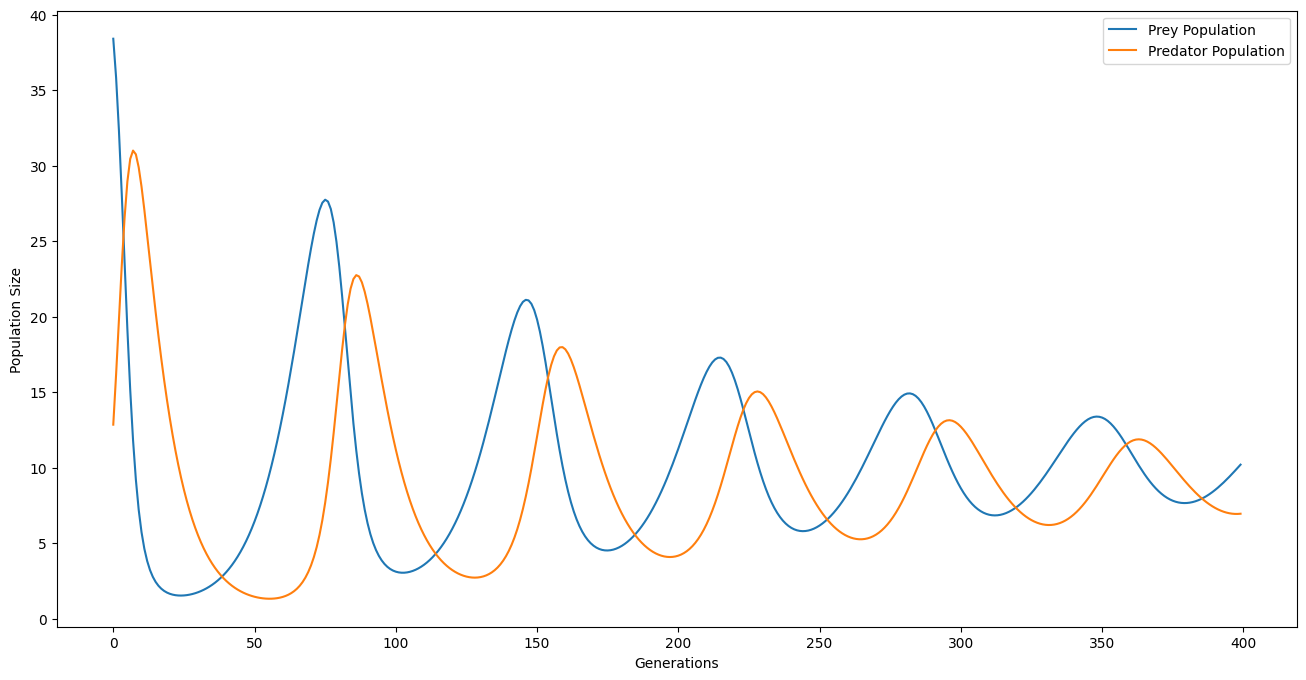

In [73]:
# Graficar los resultados
fig, ax = plt.subplots()
plt.plot(prey_history, label="Prey Population")
plt.plot(predator_history, label="Predator Population")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.legend()
fig.set_size_inches(16, 8)
plt.show()

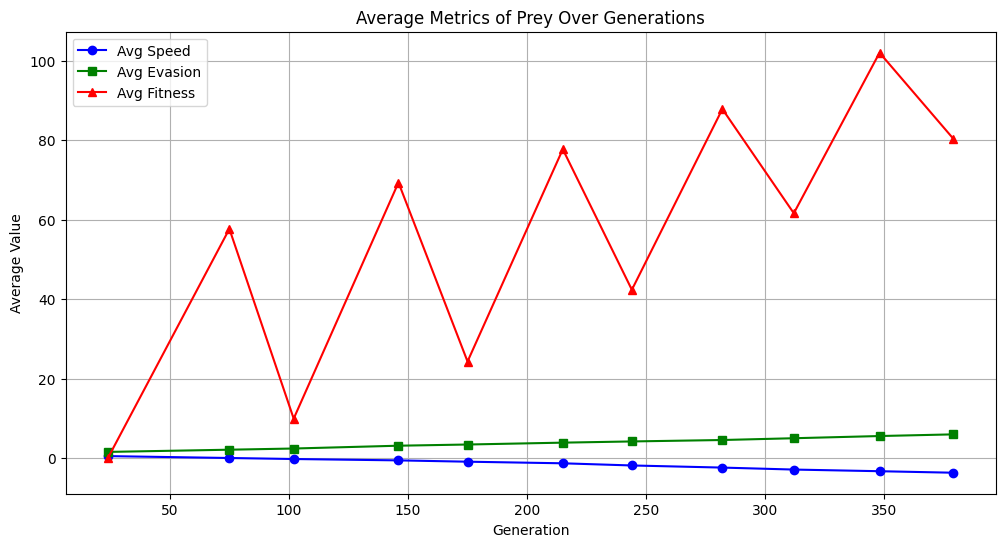

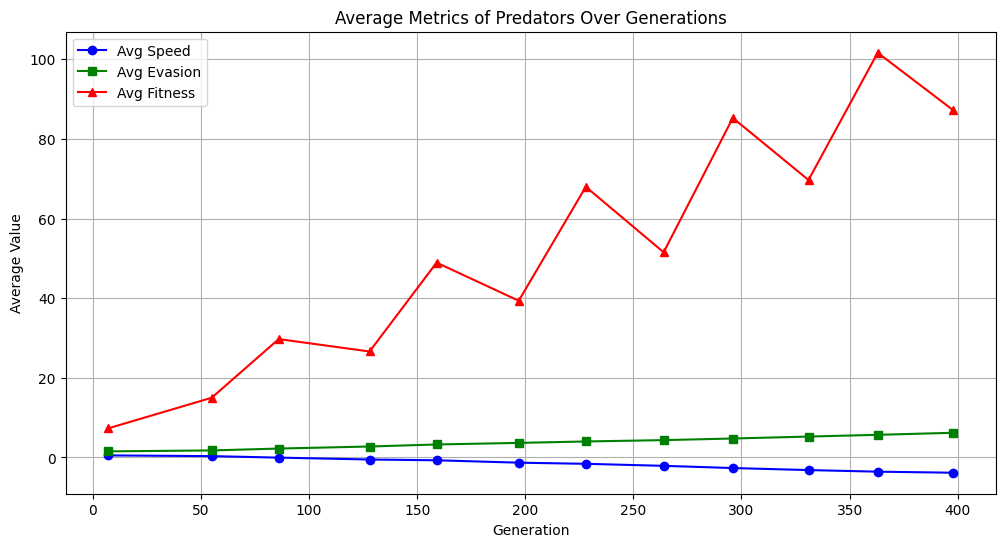

In [74]:
# Graficar métricas para las presas
plt.figure(figsize=(12, 6))
plt.plot(df_prey_peaks["generation"], df_prey_peaks["avg_speed"], label="Avg Speed", marker="o", color="blue")
plt.plot(df_prey_peaks["generation"], df_prey_peaks["avg_evasion"], label="Avg Evasion", marker="s", color="green")
plt.plot(df_prey_peaks["generation"], df_prey_peaks["avg_fitness"], label="Avg Fitness", marker="^", color="red")
plt.title("Average Metrics of Prey Over Generations")
plt.xlabel("Generation")
plt.ylabel("Average Value")
plt.grid()
plt.legend()
plt.show()

# Graficar métricas para los depredadores
plt.figure(figsize=(12, 6))
plt.plot(df_predator_peaks["generation"], df_predator_peaks["avg_speed"], label="Avg Speed", marker="o", color="blue")
plt.plot(df_predator_peaks["generation"], df_predator_peaks["avg_evasion"], label="Avg Evasion", marker="s", color="green")
plt.plot(df_predator_peaks["generation"], df_predator_peaks["avg_fitness"], label="Avg Fitness", marker="^", color="red")
plt.title("Average Metrics of Predators Over Generations")
plt.xlabel("Generation")
plt.ylabel("Average Value")
plt.grid()
plt.legend()
plt.show()

#### Control para un sistema depredador-presa


In [75]:
prey_population = 40
predator_population = 10
prey_history, predator_history = [], []

In [76]:
population = initialize_population(population_size)
print(population_size)
print(len(population))

50
50


In [77]:
# Parámetros para el modelo de saturación
r = 0.1       # Tasa de crecimiento de las presas
K = 100       # Límite de capacidad de las presas
a = 0.01      # Ineficiencia de la población de presas
c = 0.1       # Tasa de mortalidad de los depredadores
d = 0.01      # Eficiencia de caza del depredador
u1 = 1.5
u2 = -1

# Diccionario para almacenar speed, evasion y fitness
generation2_data = {}

print(population_size)
print(f"population inicial {len(population)}")
for generation in range(num_generations):
    for individual in population:
        print(f"individual speed {individual.speed}")
        print(f"individual evasion {individual.evasion}")
        individual.fitness = fitness_function(prey_population, predator_population, individual)
        print(f"individual fitness {individual.fitness}")
    
    # Selección de los mejores individuos
    parents = select_parents(population)
    
    # Crear nueva generación mediante cruce y mutación
    next_generation = []
    for i in range(0, num_parents, 2):
        child1, child2 = crossover(parents[i], parents[i + 1])
        next_generation.append(mutate(child1))
        next_generation.append(mutate(child2))
    print(f"next generation size {len(next_generation)}")
    
    # Añadir hijos mutados a la población y eliminar los menos aptos
    for u in population:
        print(f"fitness {u.fitness}")
        print(f"evasion {u.evasion}")
    population = parents + next_generation
    print(f"parents + next {len(population)}")
    
    population = sorted(population, key=lambda x: x.fitness, reverse=True)[:population_size]
    print(f"sorted {len(population)}")

    # Simulación de un paso del modelo de saturación
    prey_population += r * prey_population * (1 - prey_population / K) - a * prey_population * predator_population + u1
    print(f"prey population {prey_population}")
    predator_population += d * prey_population * predator_population - c * predator_population + u2
    print(f"predator population {prey_population} \n")

    # Guardar historia de poblaciones
    prey_history.append(prey_population)
    predator_history.append(predator_population)
    
    # Guardar datos de los primeros 5 individuos en el diccionario
    generation2_data[generation] = {
        "speed": [ind.speed for ind in population[:5]],
        "evasion": [ind.evasion for ind in population[:5]],
        "fitness": [ind.fitness for ind in population[:5]],
    }

50
population inicial 50
individual speed 0.9868341473177282
individual evasion 0.6181923624816109
individual fitness 14.859353026087156
individual speed 0.6706396673386674
individual evasion 0.5855006930705651
individual fitness 16.71363104943593
individual speed 0.5304264931890802
individual evasion 1.3726083957654307
individual fitness 49.60007089872643
individual speed 1.2904319300241707
individual evasion 0.6120790526477099
individual fitness 11.578842805666689
individual speed 1.3097892743682908
individual evasion 0.7408508574417951
individual fitness 16.536141553988895
individual speed 1.0111317174379777
individual evasion 1.0800228661196551
individual fitness 33.08959747040643
individual speed 1.0548532035118559
individual evasion 1.2427440652277444
individual fitness 39.16123057399122
individual speed 1.3875384876758825
individual evasion 1.235055041784296
individual fitness 35.52681679461301
individual speed 1.1055692220120026
individual evasion 1.2167080943540252
individual 

In [78]:
generation2_data

{0: {'speed': [0.6675728484648312,
   0.5304264931890802,
   0.5660845203944045,
   0.7610505443524807,
   1.4712532447243805],
  'evasion': [1.4998998825200442,
   1.3726083957654307,
   1.3408346707823617,
   1.370049034727944,
   1.4898041942800164],
  'fitness': [53.320266816153456,
   49.60007089872643,
   47.97254162735043,
   47.19145594559295,
   44.879635323956855]},
 1: {'speed': [0.5304264931890802,
   0.5699281900994098,
   0.6675728484648312,
   0.5304264931890802,
   0.7529570799447265],
  'evasion': [1.4998998825200442,
   1.4788942252654338,
   1.4998998825200442,
   1.3726083957654307,
   1.4386949075683255],
  'fitness': [53.48619165921269,
   52.17444058879889,
   51.84180685945644,
   48.40726133770361,
   48.37597142343891]},
 2: {'speed': [0.4645697047622406,
   0.5304264931890802,
   0.5304264931890802,
   0.5699281900994098,
   0.5660845203944045],
  'evasion': [1.4825696129130097,
   1.4998998825200442,
   1.4998998825200442,
   1.4998998825200442,
   1.4898041

In [79]:
# Suponiendo que tienes las siguientes listas de historia de poblaciones:
prey_peaks = find_peaks(prey_history)
predator_peaks = find_peaks(predator_history)

# Generar las tablas con los picos de presas y depredadores
df_prey_peaks = save_peaks_to_dataframe(prey_peaks, prey_history)
df_predator_peaks = save_peaks_to_dataframe(predator_peaks, predator_history)

In [80]:
# Calcular promedios para los picos de presas y depredadores
prey_averages = calculate_averages(df_prey_peaks["generation"].values, generation2_data)
predator_averages = calculate_averages(df_predator_peaks["generation"].values, generation2_data)

# Agregar promedios a los DataFrames
df_prey_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = prey_averages
df_predator_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = predator_averages

In [81]:
df_prey_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0           16         8.522806   0.384879     1.610752     3.412064
1           41        19.467169   0.040505     2.006649    38.387617
2           61        13.739716  -0.153786     2.195952    33.208025
3           83        16.447223  -0.363335     2.557087    48.372125
4          104        15.070193  -0.712389     2.785136    55.139998
5          125        15.747911  -0.966146     3.202370    67.731322
6          147        15.408742  -1.212728     3.393446    74.358009
7          168        15.577388  -1.571696     3.606837    84.578381
8          189        15.493261  -1.780912     3.909227    92.867370
9          211        15.535109  -2.151429     4.311307   105.920174
10         232        15.514228  -2.453804     4.413754   112.933867
11         254        15.524622  -2.706261     4.659200   121.341577
12         275        15.519447  -2.884914     4.760892   126.142195
13         296        15.522028  -2.919882     4.876973   128.583564
14         318        15.520743  -3.274085     5.084498   138.216800
15         339        15.521383  -3.465207     5.306244   145.121835
16         360        15.521064  -3.735801     5.475130   152.643406
17         382        15.521223  -4.032685     5.881523   164.328668

In [82]:
df_predator_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0            9        33.159807   0.407694     1.593059    12.886477
1           33        13.907226   0.148529     1.895833    28.961698
2           53        20.690264  -0.077578     2.123508    34.541364
3           75        16.965318  -0.277400     2.411068    42.371302
4           96        18.714507  -0.592897     2.741834    53.587509
5          118        17.819881  -0.884244     3.150731    64.779244
6          139        18.259696  -1.142387     3.407564    73.709223
7          161        18.039252  -1.485377     3.540539    81.791576
8          182        18.148607  -1.694170     3.857829    90.608258
9          203        18.093956  -2.026918     4.156058   101.186952
10         225        18.121141  -2.380726     4.377810   111.084081
11         246        18.107594  -2.630758     4.601037   119.052373
12         267        18.114347  -2.843331     4.668773   123.969311
13         289        18.110985  -2.908489     4.862598   128.149573
14         310        18.112660  -3.258027     4.997113   136.572302
15         331        18.111826  -3.386655     5.171035   141.599073
16         353        18.112241  -3.663048     5.394872   150.080642
17         374        18.112034  -3.858918     5.763043   159.342050
18         396        18.112137  -4.233308     6.052521   170.616426

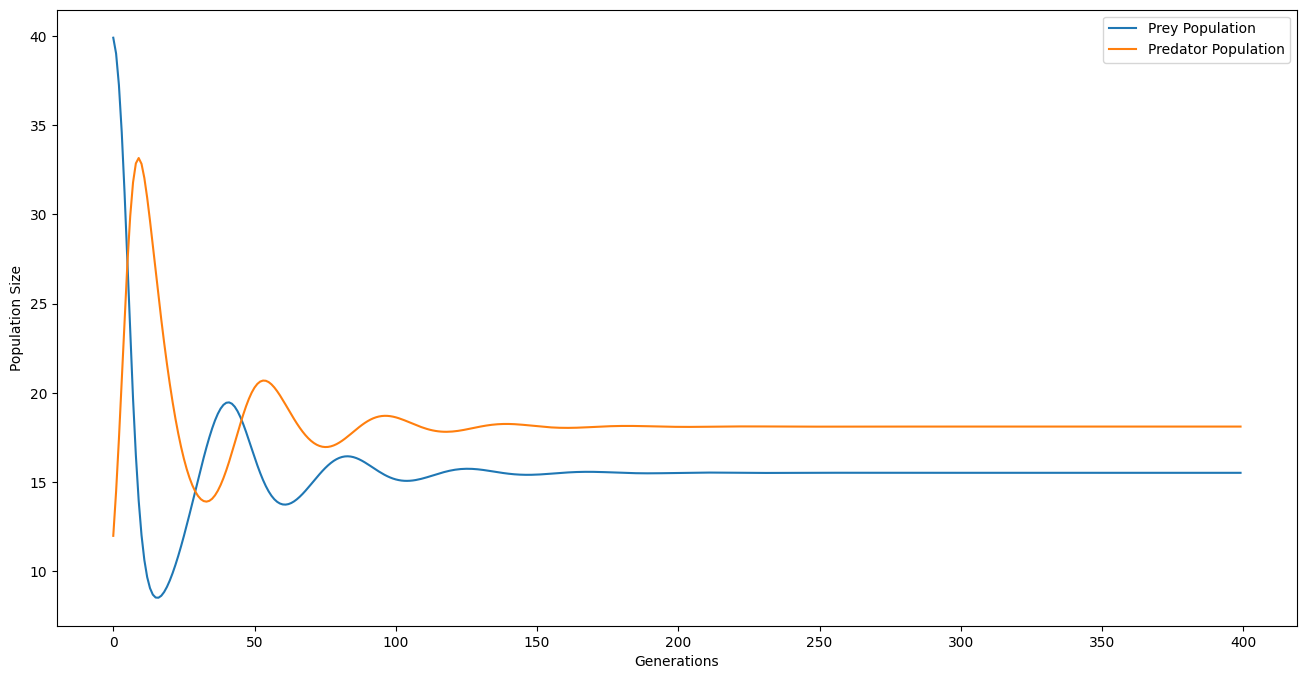

In [83]:
fig, ax = plt.subplots()
plt.plot(prey_history, label="Prey Population")
plt.plot(predator_history, label="Predator Population")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.legend()
fig.set_size_inches(16, 8)
plt.show()

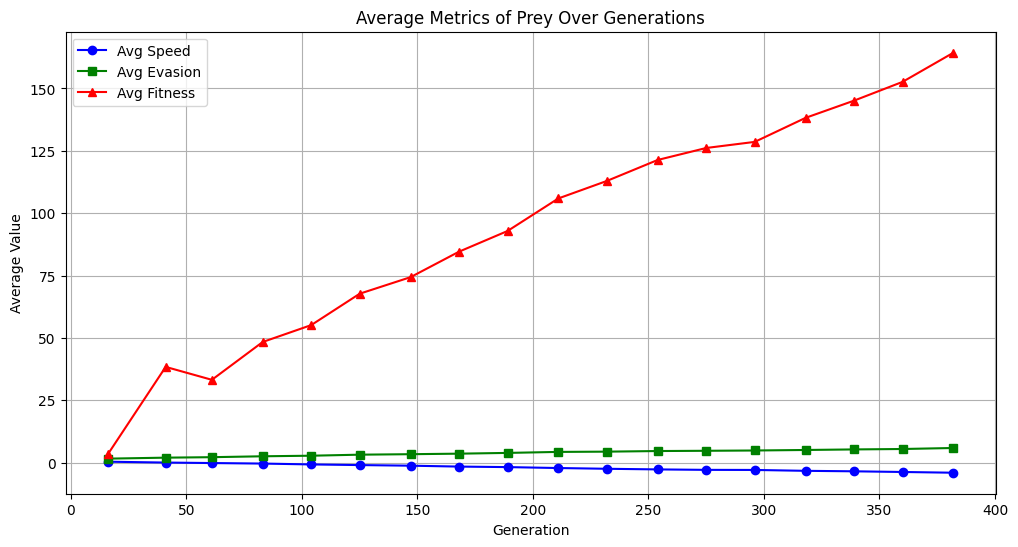

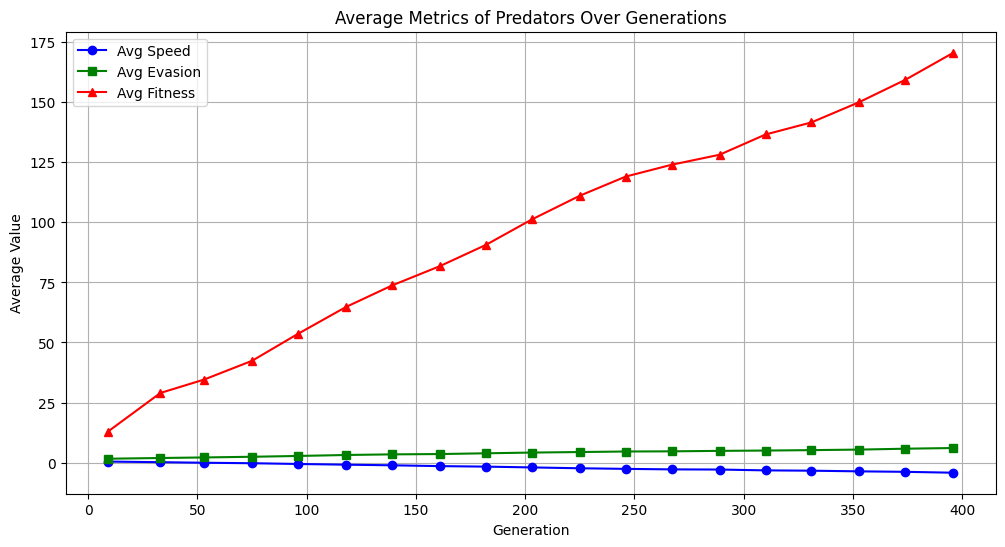

In [84]:
# Graficar métricas para las presas
plt.figure(figsize=(12, 6))
plt.plot(df_prey_peaks["generation"], df_prey_peaks["avg_speed"], label="Avg Speed", marker="o", color="blue")
plt.plot(df_prey_peaks["generation"], df_prey_peaks["avg_evasion"], label="Avg Evasion", marker="s", color="green")
plt.plot(df_prey_peaks["generation"], df_prey_peaks["avg_fitness"], label="Avg Fitness", marker="^", color="red")
plt.title("Average Metrics of Prey Over Generations")
plt.xlabel("Generation")
plt.ylabel("Average Value")
plt.grid()
plt.legend()
plt.show()

# Graficar métricas para los depredadores
plt.figure(figsize=(12, 6))
plt.plot(df_predator_peaks["generation"], df_predator_peaks["avg_speed"], label="Avg Speed", marker="o", color="blue")
plt.plot(df_predator_peaks["generation"], df_predator_peaks["avg_evasion"], label="Avg Evasion", marker="s", color="green")
plt.plot(df_predator_peaks["generation"], df_predator_peaks["avg_fitness"], label="Avg Fitness", marker="^", color="red")
plt.title("Average Metrics of Predators Over Generations")
plt.xlabel("Generation")
plt.ylabel("Average Value")
plt.grid()
plt.legend()
plt.show()

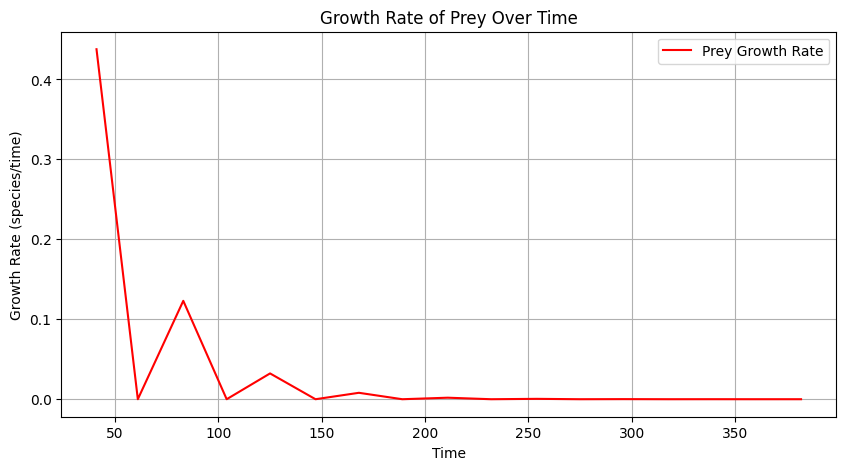

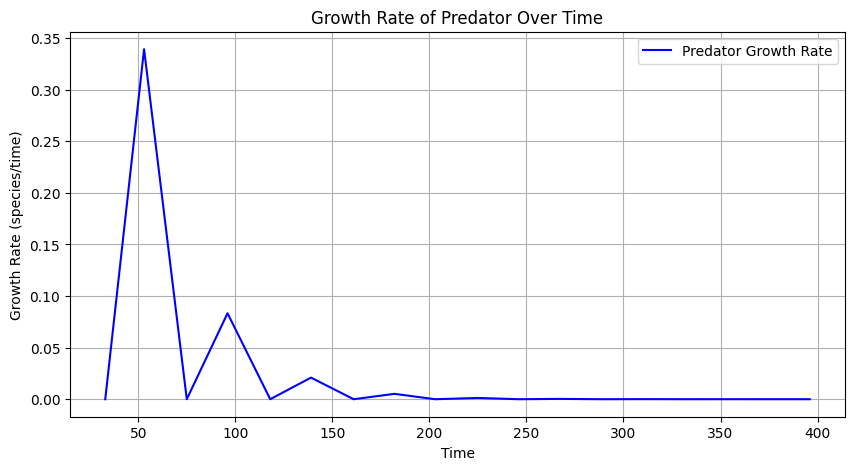

In [85]:
# Asegurarte de que no haya valores negativos en el growth rate
df_prey_peaks["growth_rate_prey"] = df_prey_peaks["population_size"].diff() / df_prey_peaks["generation"].diff()
df_predator_peaks["growth_rate_predator"] = df_predator_peaks["population_size"].diff() / df_predator_peaks["generation"].diff()

# Reemplazar valores negativos por 0
df_prey_peaks["growth_rate_prey"] = df_prey_peaks["growth_rate_prey"].clip(lower=0)
df_predator_peaks["growth_rate_predator"] = df_predator_peaks["growth_rate_predator"].clip(lower=0)

# Graficar la tasa de crecimiento de las presas (sin negativos)
plt.figure(figsize=(10, 5))
plt.plot(df_prey_peaks["generation"], df_prey_peaks["growth_rate_prey"], color="red", label="Prey Growth Rate")
plt.title("Growth Rate of Prey Over Time")
plt.xlabel("Time")
plt.ylabel("Growth Rate (species/time)")
plt.grid()
plt.legend()
plt.show()

# Graficar la tasa de crecimiento de los depredadores (sin negativos)
plt.figure(figsize=(10, 5))
plt.plot(df_predator_peaks["generation"], df_predator_peaks["growth_rate_predator"], color="blue", label="Predator Growth Rate")
plt.title("Growth Rate of Predator Over Time")
plt.xlabel("Time")
plt.ylabel("Growth Rate (species/time)")
plt.grid()
plt.legend()
plt.show()